# Ground-Touching Detection

## Type Conversion
[pascal voc xml to csv table](https://gist.github.com/rotemtam/88d9a4efae243fc77ed4a0f9917c8f6c)

In [15]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from tqdm import tqdm 

def xml2csv():
    image_path = os.path.join(os.getcwd(), 'Annotations')
    xml_list = []
    invalid_xml_list = []
    for xml_file in tqdm(glob.glob(image_path + '/*.xml')):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        objects = root.findall('object')
        for _obj in objects:
            flag = True
            bbx = _obj.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = _obj.find('name').text
            group_code = xml_file[-17:-10]
            Full_name =  group_code+"_"+root.find('filename').text
            value = (Full_name,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
        if not objects:
            invalid_xml_list.append(xml_file)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    if xml_list: # empty list check
        xml_df = pd.DataFrame(xml_list, columns=column_name)
        xml_df.to_csv(f'labels.csv', index=None)
        print(f'        "labels.csv" has been created at {os.getcwd()}.')
    if invalid_xml_list: # empty list check
        invalid_xml_df = pd.DataFrame(invalid_xml_list)
        invalid_xml_df.to_csv(f'invalid_labels.csv', index=None, header=None)
        print(f'"invalid_labels.csv" has been created at {os.getcwd()}.')
    print(f'Successfully converted xml to csv. {len(invalid_xml_list)} invalid labels has been detected.')

In [11]:
import os
os.chdir("D:/GIT_REPOS/2021-NCKU_NN/Project3_final/group1_8")
os.getcwd()
xml2csv()

100%|██████████| 27885/27885 [00:03<00:00, 7502.86it/s]


        "labels.csv" has been created at D:\GIT_REPOS\2021-NCKU_NN\Project3_final\group1_8.
"invalid_labels.csv" has been created at D:\GIT_REPOS\2021-NCKU_NN\Project3_final\group1_8.
Successfully converted xml to csv. 187 invalid labels has been detected.


## Image Name

group01_00375.jpg


,group,filename,time,width,height,class,xmin,ymin,xmax,ymax
0,NaN,group01_00375.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,group01_00376.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,group01_00377.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,group01_00378.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,group01_00379.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
40290,NaN,group08_04296.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40291,NaN,group08_04297.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40292,NaN,group08_04298.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40293,NaN,group08_04299.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Read CSV label

In [62]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

os.chdir("D:/GIT_REPOS/2021-NCKU_NN/Project3_final/group1_8")
img_files = glob.glob(os.getcwd() + '/Images/*.jpg')
img_files = [i[-17:] for i in img_files]
data = {
    'filename': img_files,
    'width': np.nan,
    'height': np.nan,
    'class': np.nan,
    'xmin': np.nan,
    'ymin': np.nan,
    'xmax': np.nan,
    'ymax': np.nan
}
df = pd.DataFrame(data=data)
df_xml = pd.read_csv('labels.csv')

j = 0
for i in tqdm(range(df.shape[0])):
    if i >= df_xml.shape[0]:
        break
    if df.iloc[i, 0] == df.iloc[j, 0]:
        df.iloc[i] = df_xml.iloc[j]
        j = j + 1


# print(df.iloc[0])
# print('='*30)
# print(df_xml.iloc[0])

 69%|██████▉   | 27791/40295 [01:14<00:33, 372.91it/s]


In [66]:
# Add group number column
group_num = [int(f[5:7]) for f in df['filename'].to_list()]
# Inverse y axis
df['ymin'] = 1080 - df['ymin']
df['ymax'] = 1080 - df['ymax']

# # Insert column: group, time
# df.insert(0, 'group', group_num)
# time_data = [int(f[-9:-4]) for f in df['filename'].to_list()]
# df.insert(1, 'time', time_data)
df

,group,time,filename,width,height,class,xmin,ymin,xmax,ymax
0,1,376,group01_00376.jpg,1920.0,1080.0,badminton,645.0,749.0,669.0,730.0
1,1,377,group01_00377.jpg,1920.0,1080.0,badminton,652.0,769.0,677.0,744.0
2,1,378,group01_00378.jpg,1920.0,1080.0,badminton,657.0,782.0,679.0,757.0
3,1,379,group01_00379.jpg,1920.0,1080.0,badminton,662.0,801.0,689.0,767.0
4,1,380,group01_00380.jpg,1920.0,1080.0,badminton,667.0,811.0,692.0,786.0
...,...,...,...,...,...,...,...,...,...,...
40290,8,4296,group08_04296.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40291,8,4297,group08_04297.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40292,8,4298,group08_04298.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40293,8,4299,group08_04299.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


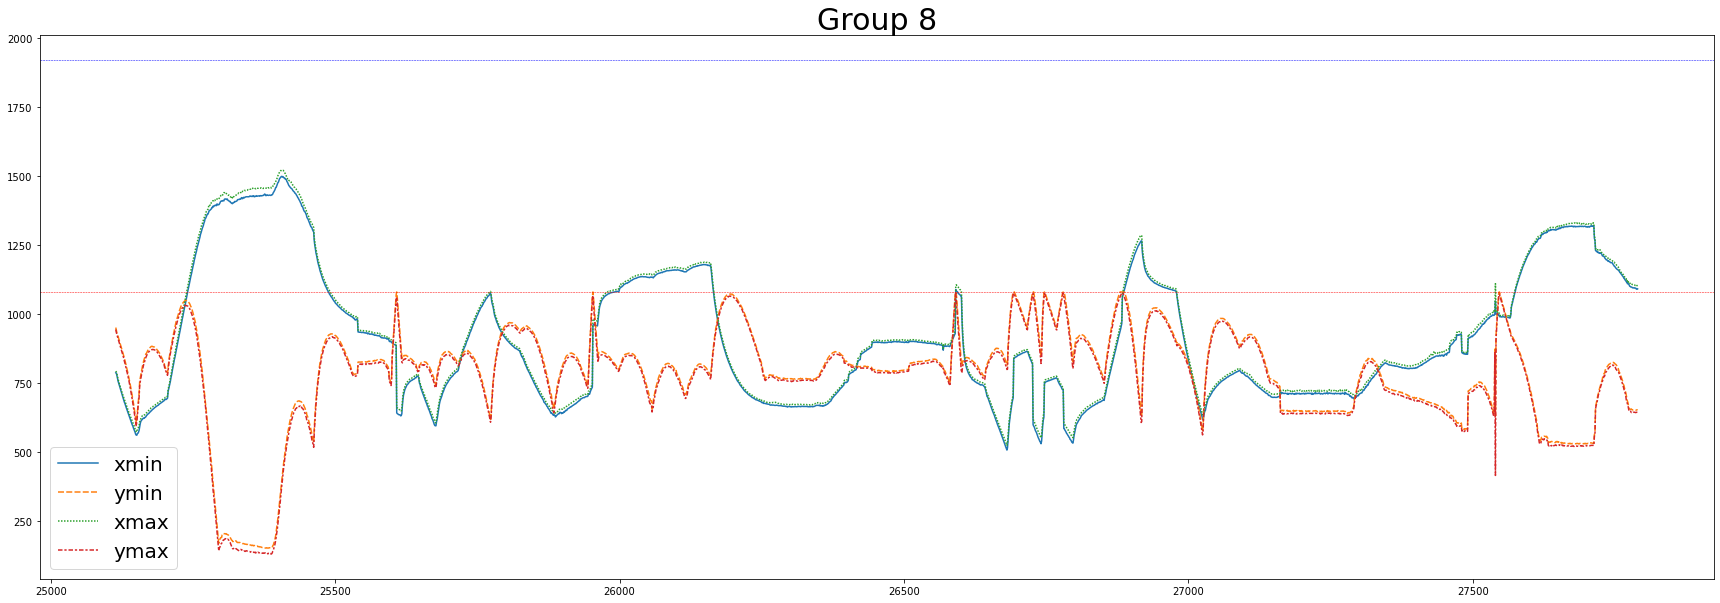

In [67]:
group_code = 8
_df = df.loc[df['group'] == group_code][['xmin', 'ymin', 'xmax', 'ymax']]
fig = plt.figure(figsize=(30, 10))
ax = sns.lineplot(data=_df).set_title(f'Group {group_code}', fontsize=30)
plt.legend(fontsize='20')
plt.axhline(y=1920, color='b', linestyle='--', linewidth=0.5)
plt.axhline(y=1080, color='r', linestyle='--', linewidth=0.5)

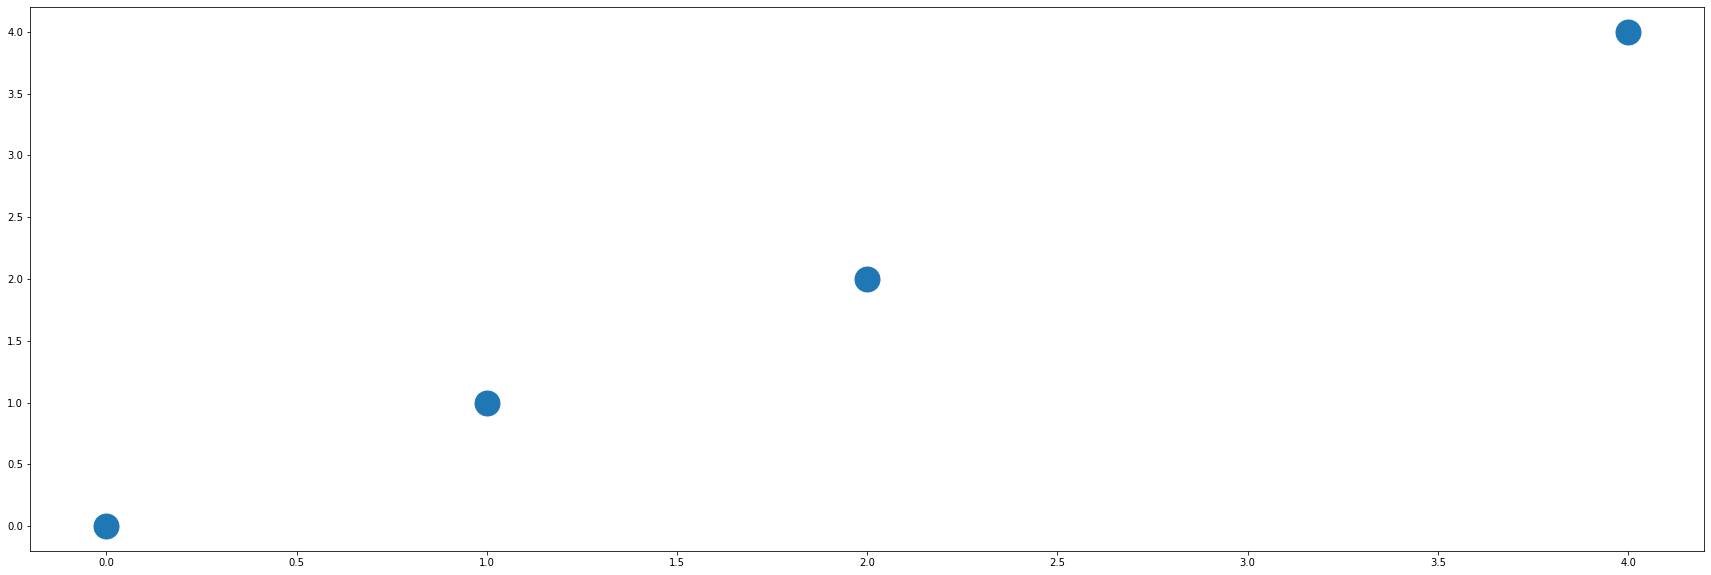

In [78]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, np.nan, 4, np.nan])
fig = plt.figure(figsize=(30, 10))
plt.plot(x, y, '.', markersize=50)